# Water Potability Classification and Water Quality Clustering Project
## by Moreno, J. and Sarabia, C.

## April 26, 2023
In partial fulfilment of CSCI 111: Introduction to Artifical Intelligence

Data set: https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [ ]:
url = "https://raw.githubusercontent.com/CSfromCS/Water-Quality-Classification-and-Clustering/b20027bf7ff5a091e96cec48531a0d44274d7e45/water_potability.csv"
df = pd.read_csv(url)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Data Pre-processing

In [ ]:
# Remove N/A rows
df = df.dropna()
df.shape

(2011, 10)

In [ ]:
columns = df.columns.tolist()
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
# Declaring original data sets
data = df.copy()

data_x = data.drop(columns=columns[-1])  # Remove y labels
data_train_x = data_x.sample(frac=0.8, random_state=0)  # Get 80% for train data
data_test_x = data_x.drop(data_train_x.index) # Get remaining data for test


data_y = data.drop(columns=columns[0:-1])  # Get y labels only
data_train_y = data_y.loc[data_train_x.index]  # Get corresponding 80% of train data
data_test_y = data_y.loc[data_test_x.index] # Get corresponding data labels

# Normalizing Data


In [ ]:
# Declare minmax normalized data sets
scaler = MinMaxScaler()
scaler.fit(data_train_x)

data_minmax_train_x = scaler.transform(data_train_x)
data_minmax_train_x = pd.DataFrame(data_minmax_train_x, index=data_train_x.index, columns=data_train_x.columns)
data_minmax_test_x = scaler.transform(data_test_x)
data_minmax_test_x = pd.DataFrame(data_minmax_test_x, index=data_test_x.index, columns=data_test_x.columns)

In [ ]:
# Declare standard normalized data set 
scaler = StandardScaler()
scaler.fit(data_train_x)

data_standard_train_x = scaler.transform(data_train_x)
data_standard_train_x = pd.DataFrame(data_standard_train_x, index=data_train_x.index, columns=data_train_x.columns)
data_standard_test_x = scaler.transform(data_test_x)
data_standard_test_x = pd.DataFrame(data_standard_test_x, index=data_test_x.index, columns=data_test_x.columns)

# Classification
via Nearest Neighbors (kNN) and Decision Trees

## Nearest Neighbors (kNN)

In [ ]:
def kNN(train_x, train_y, test_x, test_y, title="Data", max_k=30):
  test_result = test_y.copy()

  most_acc = 0
  most_acc_i = 0

  for i in range(1, max_k+1):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(train_x, train_y.values.ravel())
      knn_prediction = knn.predict(test_x)
      
      test_result[f"Knn {i}"] = knn_prediction

      # Choosing the most accurate k
      acc = accuracy_score(test_y, test_result[f'Knn {i}'])
      # print(f"n = {i}: {acc}")
      if acc > most_acc:
        most_acc = acc
        most_acc_i = i

  print(f"Nearest Neighbors with k = {most_acc_i}")
  print(f"Accuracy: {accuracy_score(test_y, test_result[f'Knn {most_acc_i}'])*100:.2f}%")
  print(f"Precision: {precision_score(test_y, test_result[f'Knn {most_acc_i}'])*100:.2f}%")
  print(f"Recall: {recall_score(test_y, test_result[f'Knn {most_acc_i}'])*100:.2f}%")
  print(f"F1 Score: {f1_score(test_y, test_result[f'Knn {most_acc_i}'])*100:.2f}%")
  cm = confusion_matrix(test_y, test_result[f"Knn {most_acc_i}"])
  disp = ConfusionMatrixDisplay(cm)
  disp.plot(cmap='BuPu')
  plt.title(f"Potability: kNN with {title} (k={most_acc_i})")
  plt.show()

Nearest Neighbors with k = 16
Accuracy: 61.94%
Precision: 51.56%
Recall: 21.29%
F1 Score: 30.14%


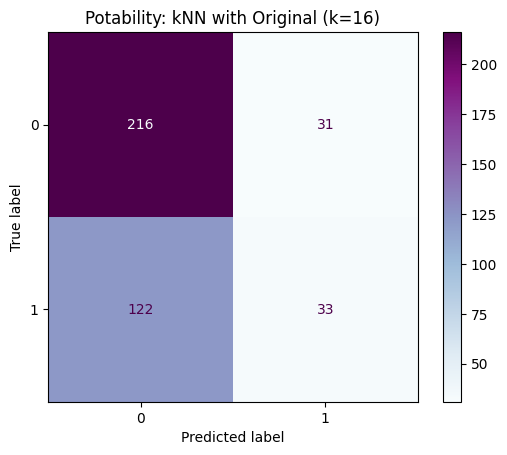

In [ ]:
kNN(data_train_x, data_train_y, data_test_x, data_test_y, "Original")

Nearest Neighbors with k = 15
Accuracy: 68.16%
Precision: 64.84%
Recall: 38.06%
F1 Score: 47.97%


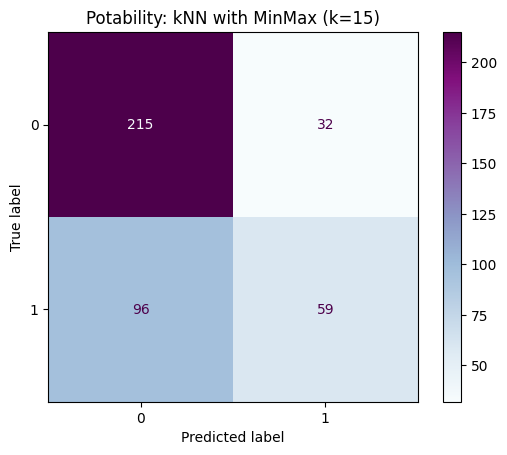

In [ ]:
kNN(data_minmax_train_x, data_train_y, data_minmax_test_x, data_test_y, "MinMax")

Nearest Neighbors with k = 10
Accuracy: 69.65%
Precision: 71.43%
Recall: 35.48%
F1 Score: 47.41%


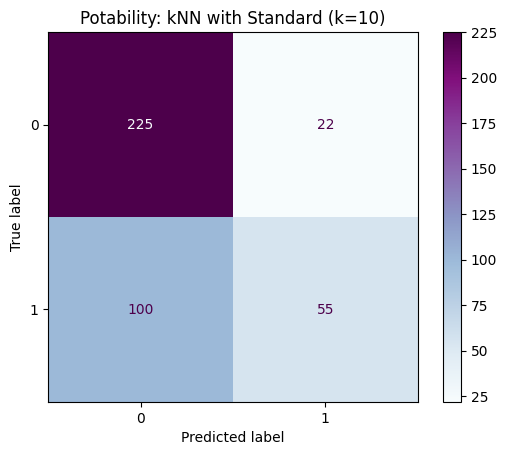

In [ ]:
kNN(data_standard_train_x, data_train_y, data_standard_test_x, data_test_y, "Standard")

## Decision Trees

In [ ]:
def decisionTree(train_x, train_y, test_x, test_y, title="Data"):
  dt = DecisionTreeClassifier()
  dt = dt.fit(train_x, train_y)

  test_result = dt.predict(test_x)

  # fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,6), dpi=200)
  # plot_tree(dt, filled=True, ax=axes)
  # plt.show()

  print(f"Decision Tree")
  print(f"Accuracy: {accuracy_score(test_y, test_result)*100:.2f}%")
  print(f"Precision: {precision_score(test_y, test_result)*100:.2f}%")
  print(f"Recall: {recall_score(test_y, test_result)*100:.2f}%")
  print(f"F1 Score: {f1_score(test_y, test_result)*100:.2f}%")
  cm = confusion_matrix(test_y, test_result)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot(cmap='BuPu')
  plt.title(f"Potability: Decision Tree with {title}")
  plt.show()

Decision Tree
Accuracy: 59.95%
Precision: 48.35%
Recall: 56.77%
F1 Score: 52.23%


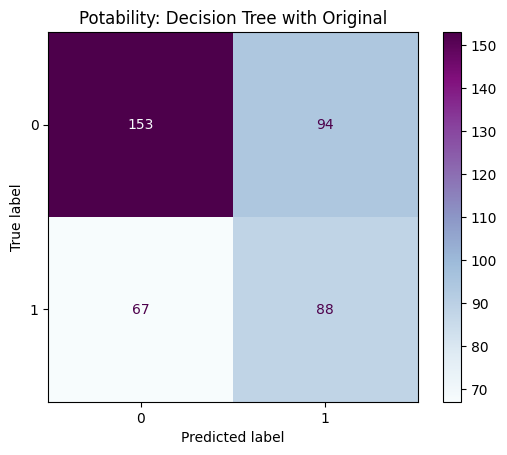

In [ ]:
decisionTree(data_train_x, data_train_y, data_test_x, data_test_y, "Original")

Decision Tree
Accuracy: 60.70%
Precision: 49.18%
Recall: 58.06%
F1 Score: 53.25%


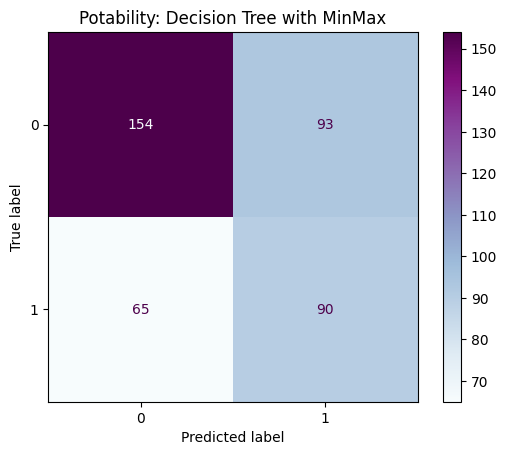

In [ ]:
decisionTree(data_minmax_train_x, data_train_y, data_minmax_test_x, data_test_y, "MinMax")

Decision Tree
Accuracy: 61.19%
Precision: 49.73%
Recall: 60.00%
F1 Score: 54.39%


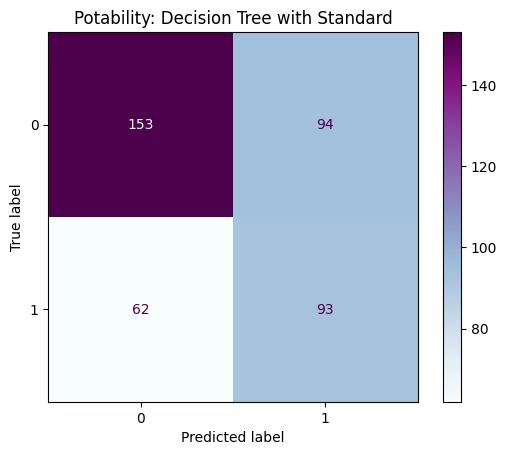

In [ ]:
decisionTree(data_standard_train_x, data_train_y, data_standard_test_x, data_test_y, "Standard")

# Clustering (K-Means)

In [ ]:
# Declaring original data sets
data = df.copy()
data_x = data.drop(columns=columns[-1])  # Remove y labels

normal_df = data_x.copy()

# Declare minmax normalized data sets
scaler = MinMaxScaler()
scaler.fit(data_x)

minmax_df = scaler.transform(data_x)
minmax_df = pd.DataFrame(minmax_df, index=data_x.index, columns=data_x.columns)

# Declare standard normalized data set 
scaler = StandardScaler()
scaler.fit(data_x)

standard_df = scaler.transform(data_x)
standard_df = pd.DataFrame(standard_df, index=data_x.index, columns=data_x.columns)

In [ ]:
# Silhouette Score using Original Dataset
# k_range is from k=2 to k=14

def kMeansWater(data_df, title="Data", max_k=30, i="Turbidity", j="Solids", debug=False):

  k_range = range(2, max_k+1)

  highest_score = -1
  k_with_highest_score = -1

  for k in k_range:
      km_model = KMeans(n_clusters = k, n_init='auto', random_state=0)
      km_model.fit(data_df)
      km_labels = km_model.predict(data_df)

      avg = silhouette_score(data_df, km_labels)
      
      # print((k, round(avg, 4)))
      
      # store if value is higher
      if avg > highest_score:
          highest_score = avg
          k_with_highest_score = k

  print("K = " + str(k_with_highest_score))
  print("Score = " + str(highest_score))

  km_model = KMeans(n_clusters=k_with_highest_score, n_init='auto', random_state=0)
  km_model.fit(data_df)
  km_labels = km_model.predict(data_df)

  if debug:
    done = set()
    for i in columns[:-1]:
      for j in columns[:-1]:
        if i != j and (i,j) not in done and (j,i) not in done:
          done.add((i,j))
          plt.scatter(data_df[i], data_df[j], c=km_labels, cmap="rainbow")
          plt.xlabel(i)
          plt.ylabel(j)
          plt.title(f"KMeans Clustering with {title} (K={k_with_highest_score})")
          plt.show()
  else:
    plt.scatter(data_df[i], data_df[j], c=km_labels, cmap="rainbow")
    plt.xlabel(i)
    plt.ylabel(j)
    plt.title(f"KMeans Clustering with {title} (K={k_with_highest_score})")
    plt.show()



K = 2
Score = 0.5714071890212253


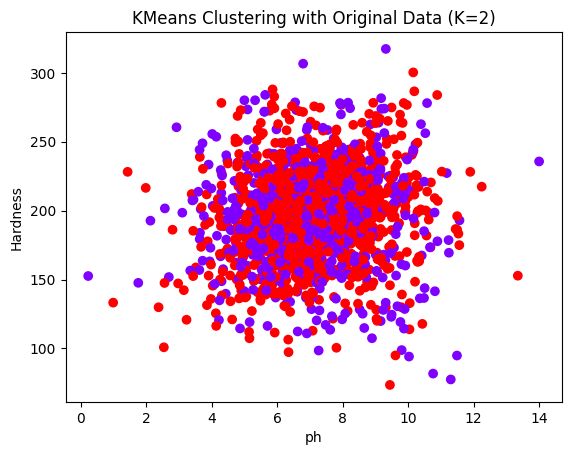

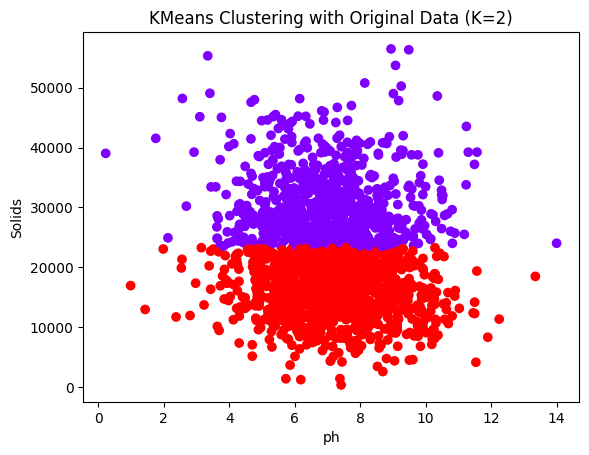

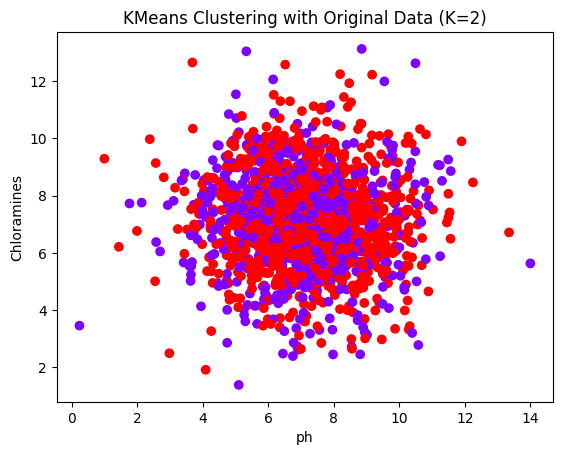

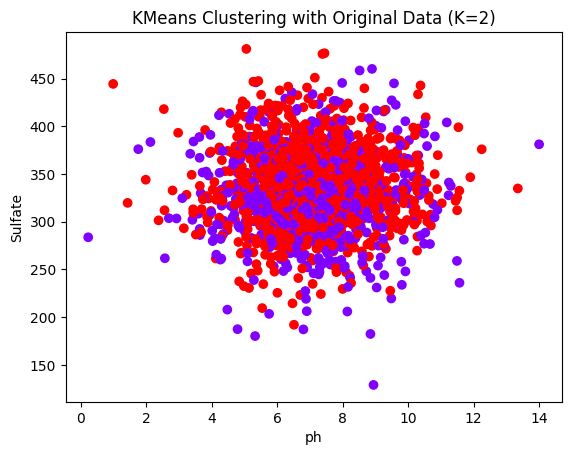

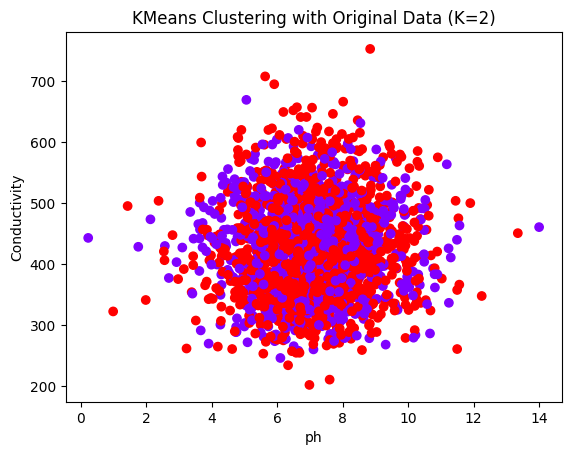

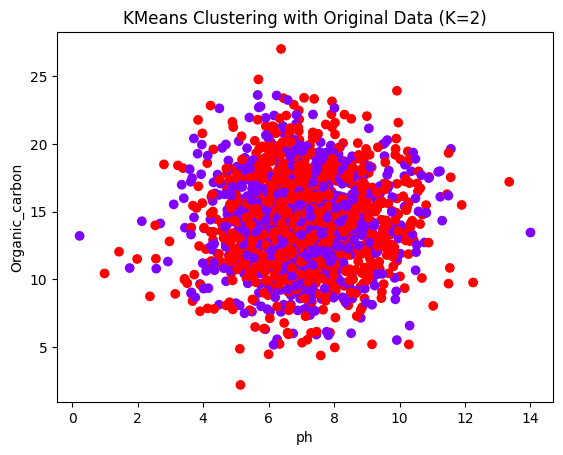

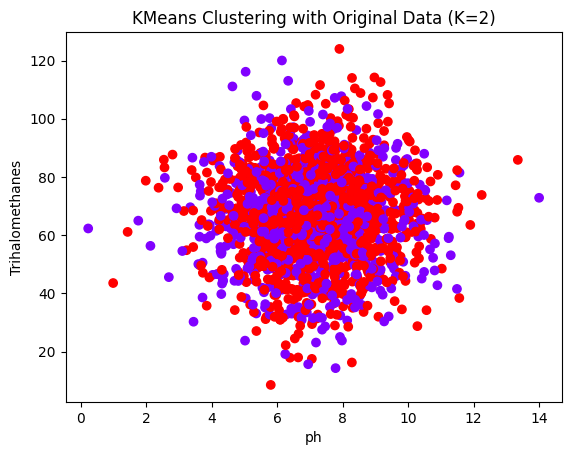

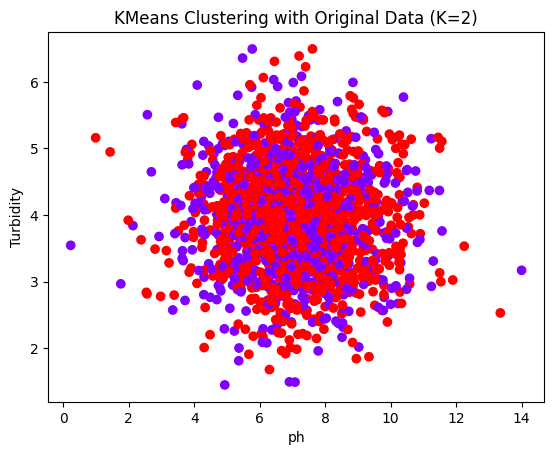

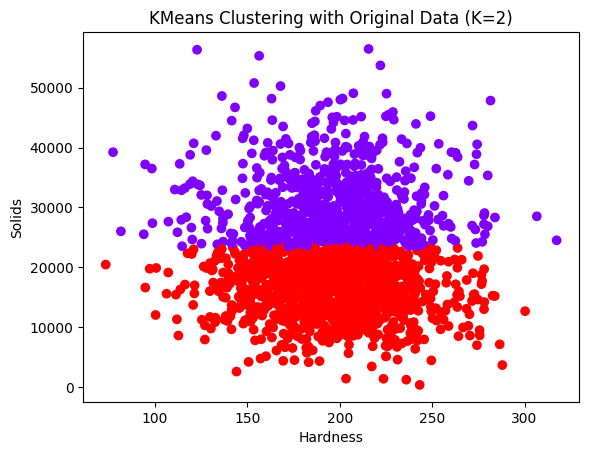

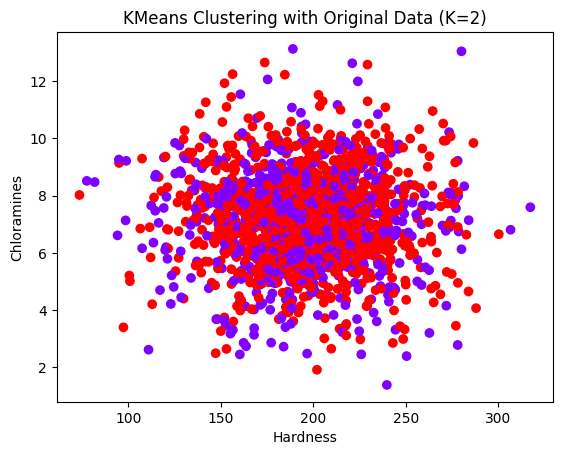

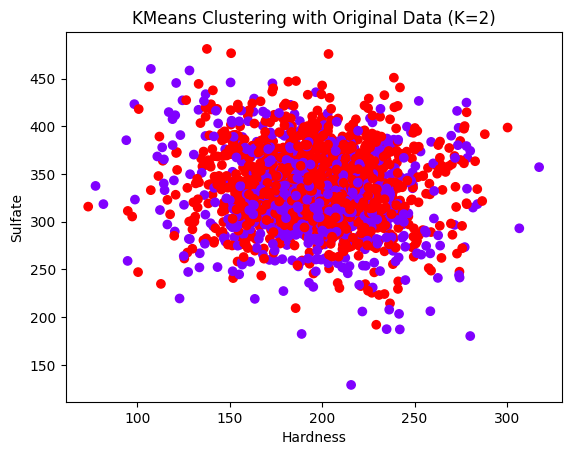

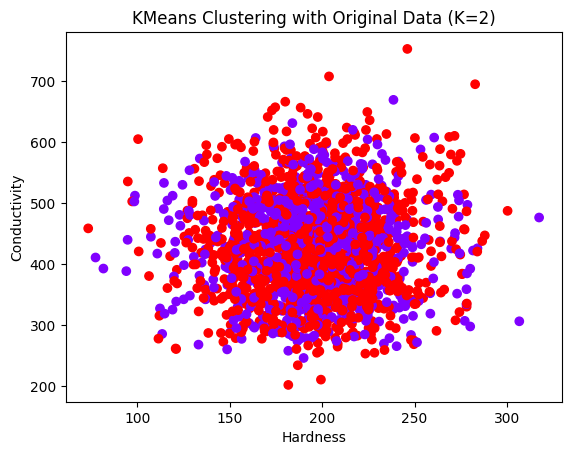

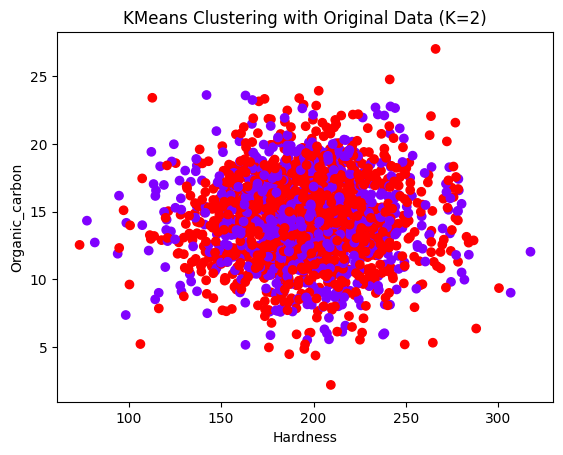

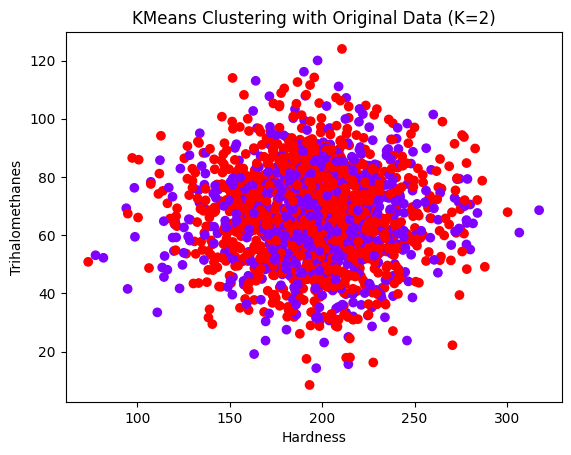

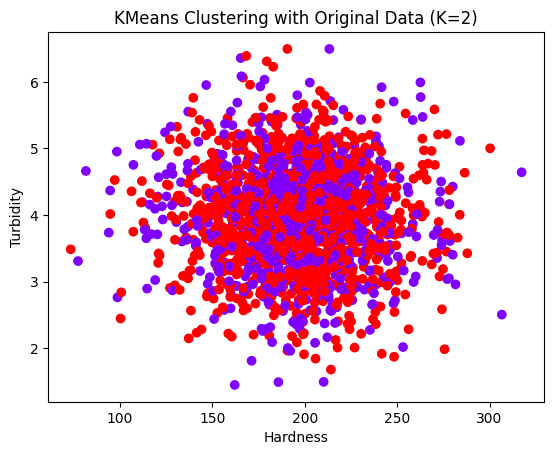

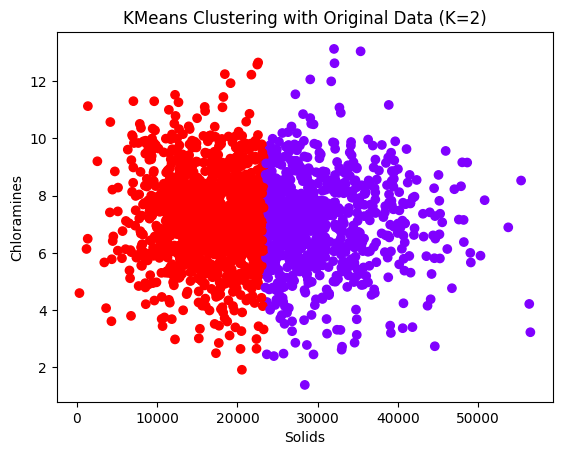

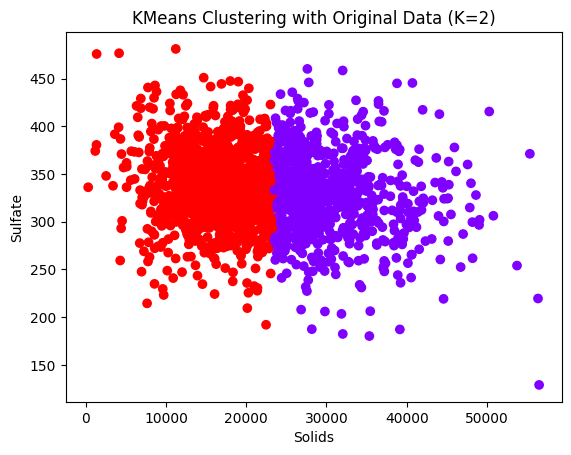

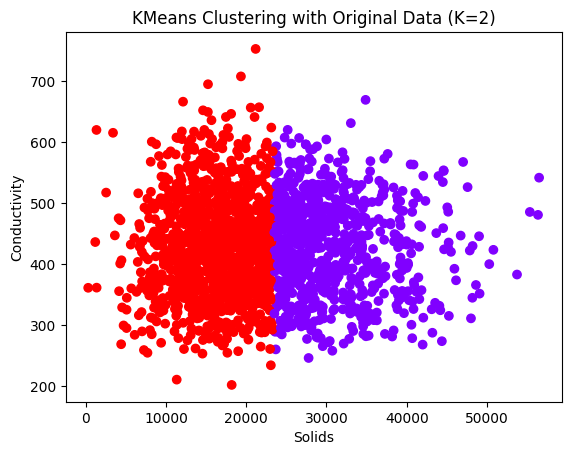

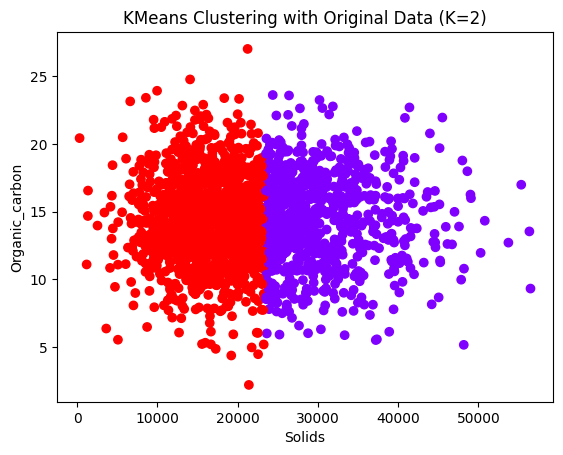

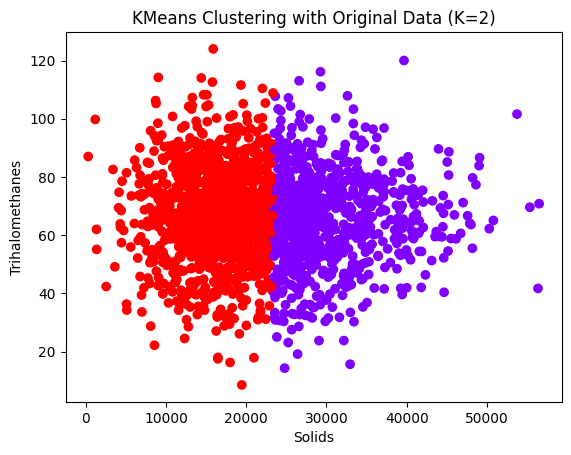

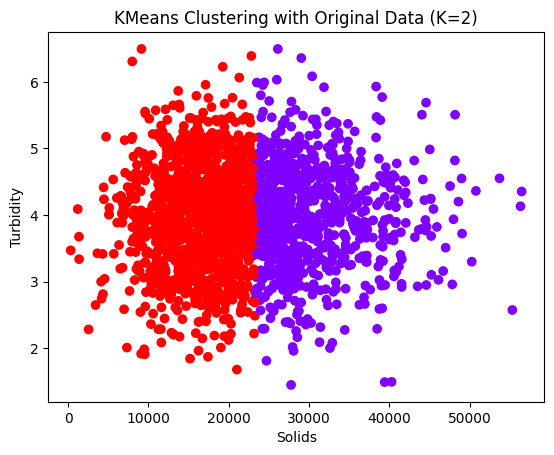

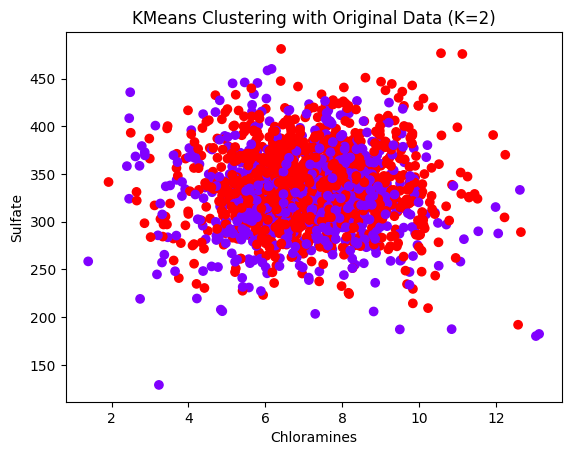

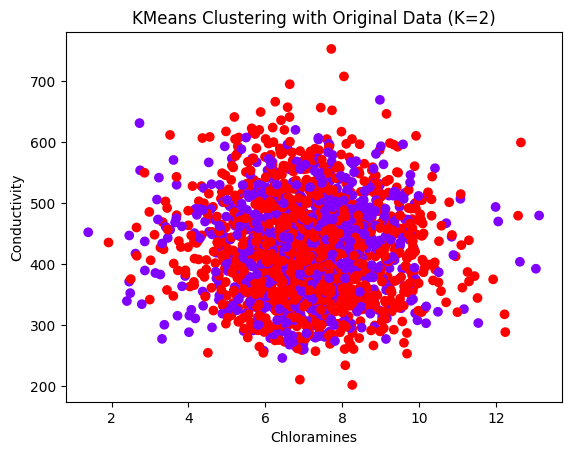

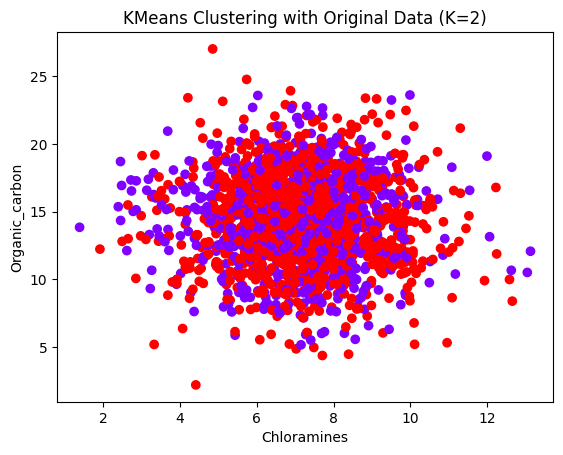

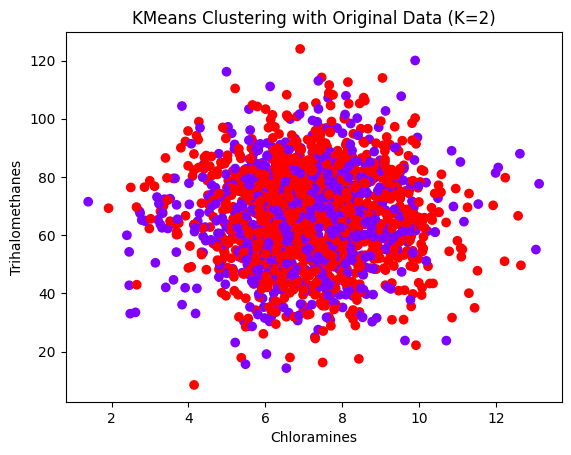

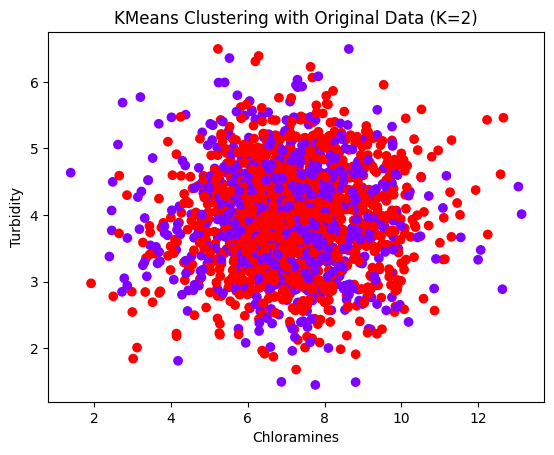

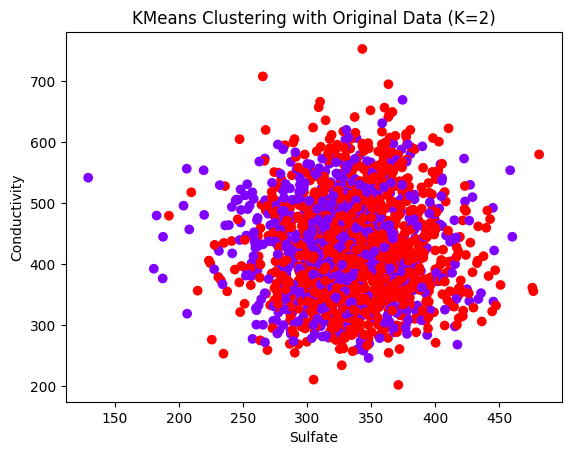

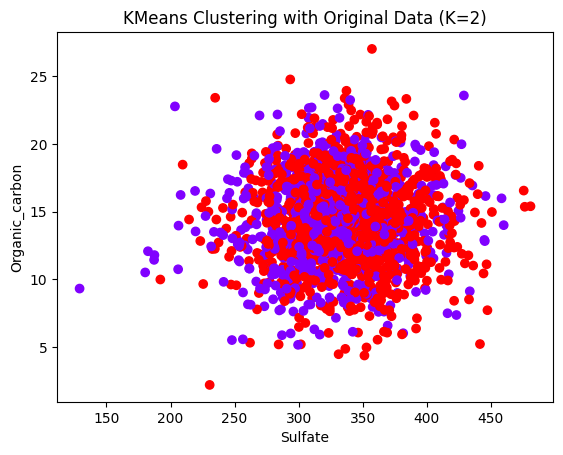

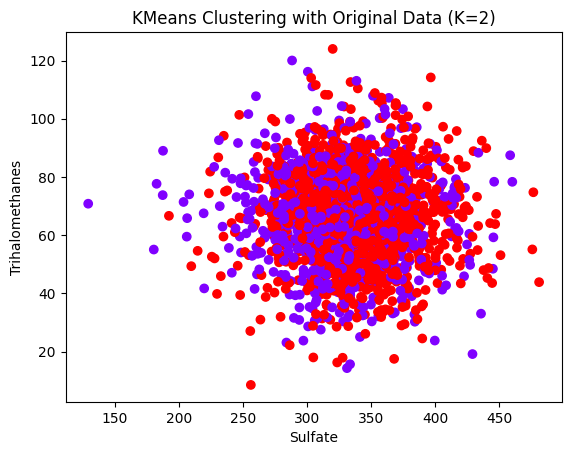

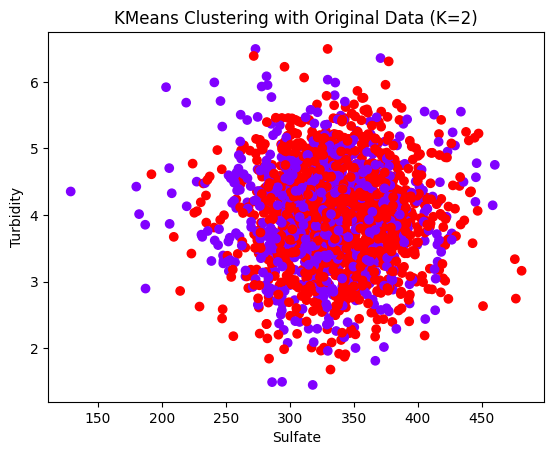

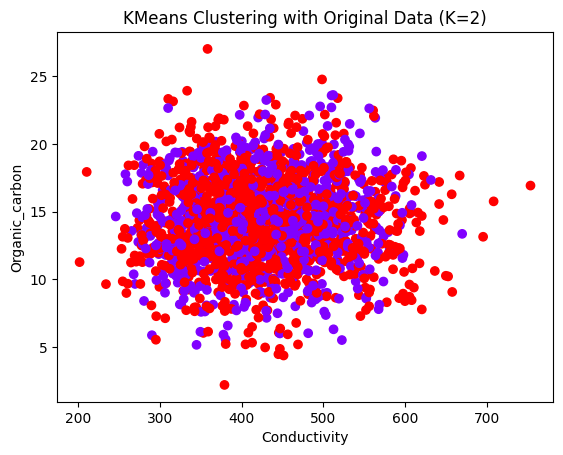

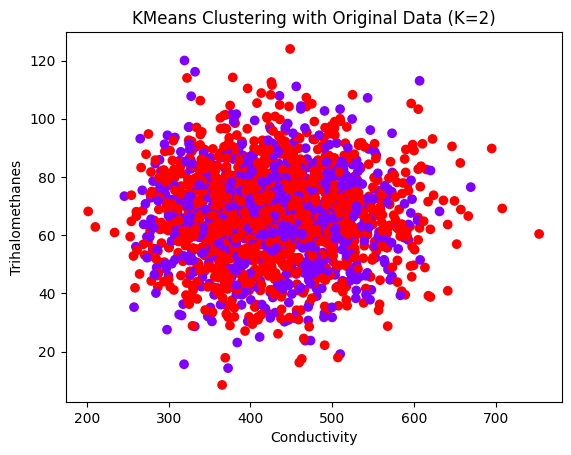

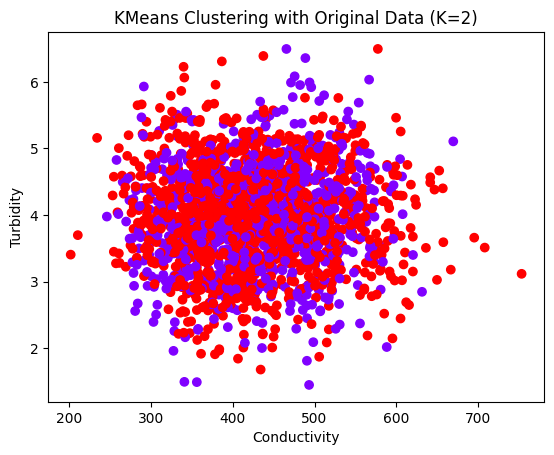

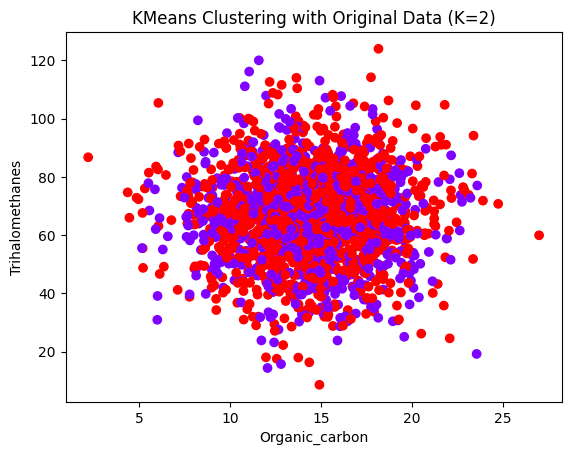

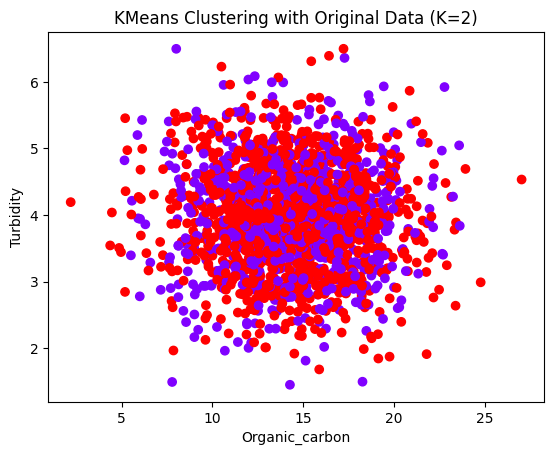

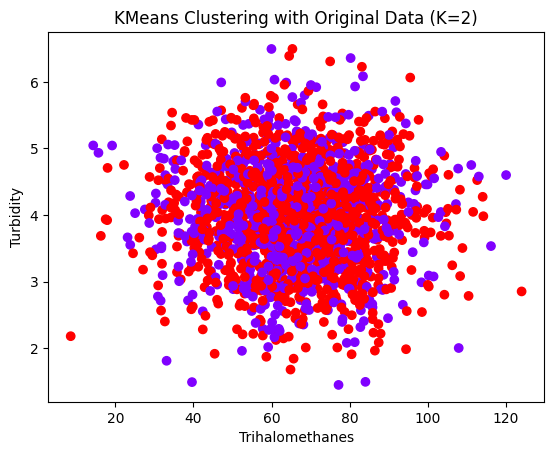

In [ ]:
kMeansWater(normal_df, "Original Data", debug=True)

K = 2
Score = 0.5714071890212253


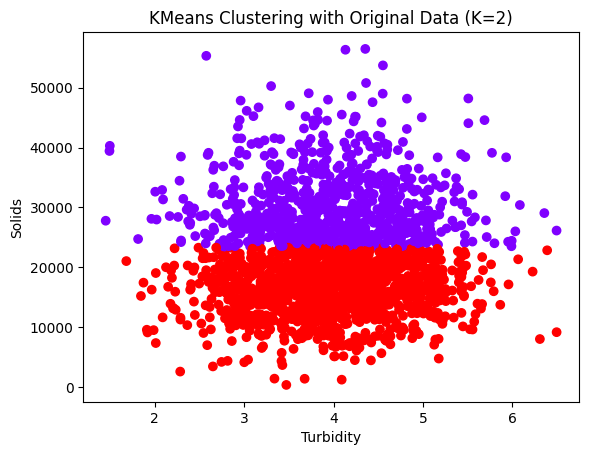

In [ ]:
kMeansWater(normal_df, "Original Data")

K = 2
Score = 0.09258560142169227


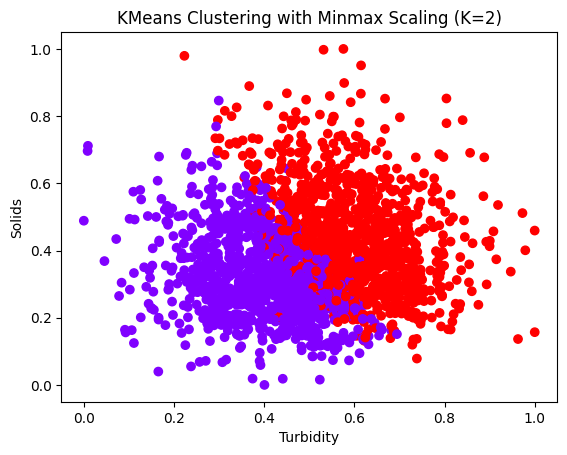

In [ ]:
kMeansWater(minmax_df, "Minmax Scaling")

K = 2
Score = 0.08235651778461356


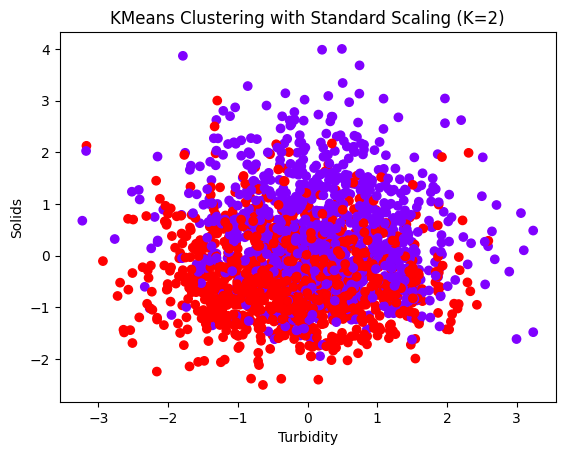

In [ ]:
kMeansWater(standard_df, "Standard Scaling")

# Summary

Water is one of the most basic needs of a human yet not everyone has access to clean and potable water. Running classification and clustering on water data allows us to see what are the biggest factors or determinant for potable drinking water and possible clustering of them.

### Classification

From testing with nearest neighbors and decision trees on the original data, normalized data via minmax scaling, and normalized data via standard scaling, we recommend using nearest neighbors on standard scaled data.

By standard scaling the data and running it on the nearest neighbors with k of 10, it gives the highest precision score of 71.43%. This score shows that of all that the model claims to be true, or safe for drinking in this case, 71.43% is correct.

We argue that precision is the most important measure in this context because we want to minimize false negatives as this directly leads to falsely labeling something as safe when it is not. Though this model doesn't capture more of the true safe water (recall is only 35% compared to decision tree with standard scaling's recall of 63%), it is better to "lose" safe water than mislabel them as safe.

To ensure that what is determined as safe is truly safe, we want to maximize precision and in this case, we recommend using Nearest Neighbors with Standard Scaling on the data.

### Clustering

To cluster the numerical features, we found that using the original data and K-means clustering with k=2, we get the highest silhoutte score of 0.571. The best pair of features to visualize the clustering used is Solids against Turbidity.